In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
raw_data = pd.read_csv('Data/nba_logreg.csv')

In [7]:
data = raw_data.drop('Name',axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GP           1340 non-null   int64  
 1   MIN          1340 non-null   float64
 2   PTS          1340 non-null   float64
 3   FGM          1340 non-null   float64
 4   FGA          1340 non-null   float64
 5   FG%          1340 non-null   float64
 6   3P Made      1340 non-null   float64
 7   3PA          1340 non-null   float64
 8   3P%          1329 non-null   float64
 9   FTM          1340 non-null   float64
 10  FTA          1340 non-null   float64
 11  FT%          1340 non-null   float64
 12  OREB         1340 non-null   float64
 13  DREB         1340 non-null   float64
 14  REB          1340 non-null   float64
 15  AST          1340 non-null   float64
 16  STL          1340 non-null   float64
 17  BLK          1340 non-null   float64
 18  TOV          1340 non-null   float64
 19  TARGET

In [9]:
data.isnull().sum()

GP              0
MIN             0
PTS             0
FGM             0
FGA             0
FG%             0
3P Made         0
3PA             0
3P%            11
FTM             0
FTA             0
FT%             0
OREB            0
DREB            0
REB             0
AST             0
STL             0
BLK             0
TOV             0
TARGET_5Yrs     0
dtype: int64

In [10]:
data = data.dropna(axis=0)

In [11]:
data.isnull().sum()

GP             0
MIN            0
PTS            0
FGM            0
FGA            0
FG%            0
3P Made        0
3PA            0
3P%            0
FTM            0
FTA            0
FT%            0
OREB           0
DREB           0
REB            0
AST            0
STL            0
BLK            0
TOV            0
TARGET_5Yrs    0
dtype: int64

In [12]:
x = data.drop('TARGET_5Yrs', axis=1)

In [13]:
y = data['TARGET_5Yrs']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(x)

StandardScaler()

In [17]:
x_scaled = scaler.transform(x)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=111)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
knn = KNeighborsClassifier(1)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
pred = knn.predict(x_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[ 75  60]
 [ 95 169]]


              precision    recall  f1-score   support

         0.0       0.44      0.56      0.49       135
         1.0       0.74      0.64      0.69       264

    accuracy                           0.61       399
   macro avg       0.59      0.60      0.59       399
weighted avg       0.64      0.61      0.62       399



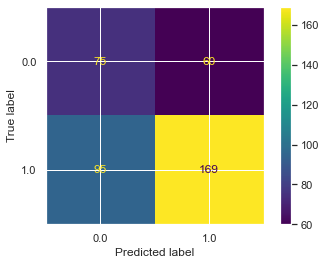

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred, labels= knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
disp.plot()

In [27]:
#Finding the number of Neighbors

In [28]:
error_rate = []
for i in range(1,10):
    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))
    

Text(0, 0.5, 'Error Rate')

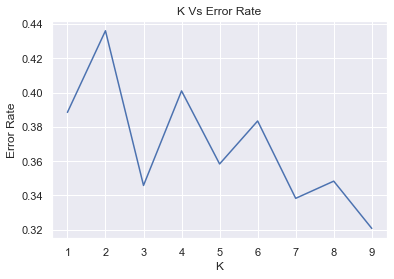

In [29]:
plt.plot(range(1,10), error_rate)
plt.title('K Vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [30]:
knn = KNeighborsClassifier(7)
knn.fit(x_train,y_train)
pre = knn.predict(x_test)
print(confusion_matrix(y_test,pre))
print('\n')
print(classification_report(y_test,pre))

[[ 68  67]
 [ 68 196]]


              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50       135
         1.0       0.75      0.74      0.74       264

    accuracy                           0.66       399
   macro avg       0.62      0.62      0.62       399
weighted avg       0.66      0.66      0.66       399



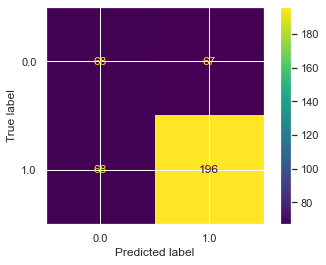

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pre, labels= knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
disp.plot()

In [32]:
knn = KNeighborsClassifier(9)
knn.fit(x_train,y_train)
pre = knn.predict(x_test)
print(confusion_matrix(y_test,pre))
print('\n')
print(classification_report(y_test,pre))

[[ 73  62]
 [ 66 198]]


              precision    recall  f1-score   support

         0.0       0.53      0.54      0.53       135
         1.0       0.76      0.75      0.76       264

    accuracy                           0.68       399
   macro avg       0.64      0.65      0.64       399
weighted avg       0.68      0.68      0.68       399



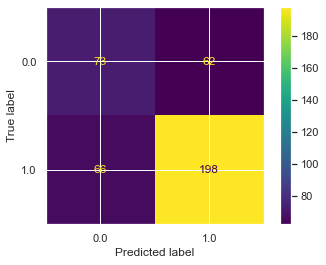

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pre, labels= knn.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels = knn.classes_)
disp.plot()